Predicting the selling price of Laptops


In [45]:
# Improting the neccesary libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib


Loading the Data

In [46]:
# Loading the dataset.
df = pd.read_csv('laptop_price.csv')
orig_df = df

In [47]:
# Printing the DataFrame.
print(df)

      laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    144

Exploring the Dataset

In [48]:
# Displaying the first five rows of the DataFrame.
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [49]:
#Exploring with statistics.
df.describe()

,laptop_ID,Inches,Price_in_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [50]:
#Checking rows (samples) and columns (features) of the dataset.
df.shape

(1303, 13)

In [51]:
#Showing information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [52]:
#Checking for missing values.
print("Missing values:")
print(df.isnull().sum())

Missing values:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64


Cleaning the Data

In [53]:
#Here, I am dropping the 'laptop_ID', 'Product', 'Inches' column beacuase it is not needed for the price prediction.
df.drop(columns=['laptop_ID', 'Product', 'Inches'], inplace=True)

In [54]:
#Dropping any rows with missing values.
df.dropna(inplace=True)

Making Change to some of the Columns

In [55]:
#Converting '8GB' (text) to 8 (integer) in the 'Ram' column. 
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [56]:
#Here also, I am converting 'Weight' column from text ('1.2kg') to float (1.2).
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [57]:
#Creating 'Resolution' column from 'ScreenResolution'.
df['Resolution'] = df['ScreenResolution'].apply(lambda x: '4K' if '4K' in x else ('Full HD' if 'Full HD' in x else 'Others'))

In [58]:
#Extracting 'Cpu_Brand' from 'Cpu' as new feature.
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])

In [59]:
#Same applies here, extracting 'Gpu_Brand'  from 'Gpu' as new feature.
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [60]:
#Checking the unique values in 'Memory'.
print(df['Memory'].unique())


['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [61]:
#Converting 'Memory' values to integer.
def process_memory(memory):
    memory = memory.replace('GB', '').replace('TB', '000').replace('Hybrid', '').strip()
    parts = memory.split('+')
    storage = {"SSD": 0, "HDD": 0, "Flash_Storage": 0, "Hybrid": 0}
    
    for part in parts:
        part = part.strip()
        try:
            if 'SSD' in part:
                storage['SSD'] += int(float(part.replace('SSD', '').strip()))
            elif 'HDD' in part:
                storage['HDD'] += int(float(part.replace('HDD', '').strip()))
            elif 'Flash Storage' in part or 'Flash_Storage' in part:
                storage['Flash_Storage'] += int(float(part.replace('Flash Storage', '').replace('Flash_Storage', '').strip()))
            elif 'Hybrid' in part:
                storage['Hybrid'] += int(float(part.strip()))
        except ValueError:
            print(f"Unexpected format: {part}")
    
    return storage

#Here, I have to apply the function to the 'Memory' column.
memory_data = df['Memory'].apply(process_memory)

#Creating storage types into new columns.
df['SSD'] = memory_data.apply(lambda x: x['SSD'])
df['HDD'] = memory_data.apply(lambda x: x['HDD'])
df['Flash_Storage'] = memory_data.apply(lambda x: x['Flash_Storage'])
df['Hybrid'] = memory_data.apply(lambda x: x['Hybrid'])

#Dropping the original 'Memory' column.
df.drop(columns=['Memory'], inplace=True)

#Printing the result.
print(df.head())


  Company   TypeName                    ScreenResolution  \
0   Apple  Ultrabook  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook                            1440x900   
2      HP   Notebook                   Full HD 1920x1080   
3   Apple  Ultrabook  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram                           Gpu  OpSys  \
0        Intel Core i5 2.3GHz    8  Intel Iris Plus Graphics 640  macOS   
1        Intel Core i5 1.8GHz    8        Intel HD Graphics 6000  macOS   
2  Intel Core i5 7200U 2.5GHz    8         Intel HD Graphics 620  No OS   
3        Intel Core i7 2.7GHz   16            AMD Radeon Pro 455  macOS   
4        Intel Core i5 3.1GHz    8  Intel Iris Plus Graphics 650  macOS   

   Weight  Price_in_euros Resolution Cpu_Brand Gpu_Brand  SSD  HDD  \
0    1.37         1339.69     Others     Intel     Intel  128    0   
1    1.34          898.94     Others     Intel  

In [62]:
#Creating 'Performance' feature by combining 'Ram' and 'Cpu_Brand'.
cpu_performance_mapping = {
    'Intel': 2,
    'AMD': 1,
    'Others': 0
}

df['Performance'] = df['Ram'] * df['Cpu_Brand'].map(cpu_performance_mapping).fillna(0)

In [63]:
#Using OneHotEncoding for categorical variables.
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'OpSys', 'Resolution', 'Gpu_Brand'], drop_first=True)


Splitting the Data

In [64]:
#'Price_in_euros' is the target.
X = df.drop(columns=['Price_in_euros'])
y = df['Price_in_euros']


In [65]:
#Here, I am splitting the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [66]:
#Aligning the columns between train and test data
X_test = X_test[X_train.columns]

In [67]:
#Checking the target y_train.
print(y_train)

285      659.00
1139    2171.72
1234     959.00
526      799.00
266     1499.00
         ...   
1095     799.00
1130     629.00
1294     549.99
860      850.66
1126     479.00
Name: Price_in_euros, Length: 977, dtype: float64


In [68]:
#Checking for non-numeric data.
print(X_train.dtypes)


ScreenResolution         object
Cpu                      object
Ram                       int64
Gpu                      object
Weight                  float64
Cpu_Brand                object
SSD                       int64
HDD                       int64
Flash_Storage             int64
Hybrid                    int64
Performance             float64
Company_Apple              bool
Company_Asus               bool
Company_Chuwi              bool
Company_Dell               bool
Company_Fujitsu            bool
Company_Google             bool
Company_HP                 bool
Company_Huawei             bool
Company_LG                 bool
Company_Lenovo             bool
Company_MSI                bool
Company_Mediacom           bool
Company_Microsoft          bool
Company_Razer              bool
Company_Samsung            bool
Company_Toshiba            bool
Company_Vero               bool
Company_Xiaomi             bool
TypeName_Gaming            bool
TypeName_Netbook           bool
TypeName

In [69]:
#Checking the samples X_train.
print(X_train)

                               ScreenResolution                          Cpu  \
285   IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
1139                          Full HD 1920x1080   Intel Core i7 6500U 2.5GHz   
1234                                   1366x768         Intel Core i5 1.6GHz   
526                           Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   
266             Full HD / Touchscreen 1920x1080   Intel Core i7 8550U 1.8GHz   
...                                         ...                          ...   
1095                          Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
1130                                   1366x768   Intel Core i7 7500U 2.7GHz   
1294                          Full HD 1920x1080    AMD A9-Series 9410 2.9GHz   
860                 IPS Panel Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
1126            IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz   

      Ram                      Gpu  Wei

Standardisation of Numerical Features

In [70]:

#Dropping any columns that are still non-numeric.
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

#Applying StandardScaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Checking the first 5 rows of scaled data.
print(X_train[:5])


[[ 0.79405203  0.20023625 -0.9734605   1.15264909 -0.16494383  0.
   0.8129464 ]
 [-0.04873866 -0.21399529  0.40008205 -0.81269144 -0.16494383  0.
  -0.01677273]
 [-0.89152936 -1.44134802 -0.9734605  -0.81269144  8.20649112  0.
  -0.84649185]
 [-0.89152936  0.2769458  -0.9734605   1.15264909 -0.16494383  0.
  -0.84649185]
 [-0.04873866 -1.4106642   4.52070969 -0.81269144 -0.16494383  0.
  -0.01677273]]


Model Training and Evaluation

Machine Learning Algorithm (Linear Regression model)

In [71]:
# Firsly, I am using linear regression model.
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [72]:
#Making predictions on the test set.
y_pred = lr_model.predict(X_test)

In [73]:
#Saving the trained Linear Regression model
joblib.dump(lr_model, 'LinearRegressionModel.pkl')
print("Linear Regression model saved as 'LinearRegressionModel.pkl'")

Linear Regression model saved as 'LinearRegressionModel.pkl'


In [74]:
#Calculating the evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 311.4703394117816
Mean Squared Error (MSE): 198685.52281987114
Root Mean Squared Error (RMSE): 445.74154262293206
R² Score: 0.6264155670351388


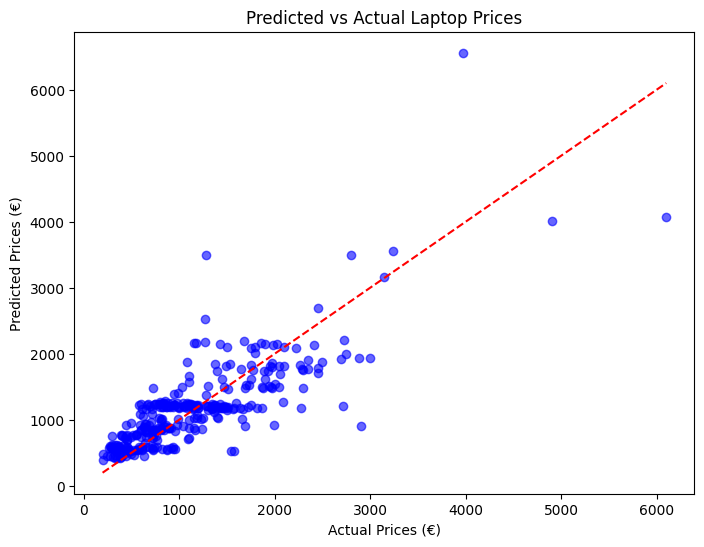

In [75]:
#Plotting a scatter graph of the results.
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('Predicted vs Actual Laptop Prices')
plt.xlabel('Actual Prices (€)')
plt.ylabel('Predicted Prices (€)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.show()

Machine Learning Algorithm (Decicion Tree Regression model)

In [76]:
#Secondly, I am trying with desicion tree regression model.
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [77]:
#Making predictions on the test set.
y_pred = dt_model.predict(X_test)


In [78]:
#Calculating the evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 289.32135536055625
Mean Squared Error (MSE): 253305.154090241
Root Mean Squared Error (RMSE): 503.29430166676934
R² Score: 0.5237153617696035


Machine Learning Algorithm ( Random Forest Regression Model)

In [79]:
#Lastly, I am trying with random forest regression model.
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [80]:
#Making predictions on the test set.
y_pred = rf_model.predict(X_test)

In [81]:
#Calculating the evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 250.5431510172911
Mean Squared Error (MSE): 162177.68054900412
Root Mean Squared Error (RMSE): 402.7129008971579
R² Score: 0.6950605360291675


In [82]:
#Saving the trained Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')
print("Random Forest model saved as 'rf_model.pkl'")


Random Forest model saved as 'rf_model.pkl'


Summary of the Result

In [83]:
# Finally, I am summarising all the results model used, for a better comparision.
#metrics for linear regression.
mae_lr = mean_absolute_error(y_test, lr_model.predict(X_test))
mse_lr = mean_squared_error(y_test, lr_model.predict(X_test))
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, lr_model.predict(X_test))

#metrics for decision tree regression.
mae_dt = mean_absolute_error(y_test, dt_model.predict(X_test))
mse_dt = mean_squared_error(y_test, dt_model.predict(X_test))
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_model.predict(X_test))

#metrics for random forest regression.
mae_rf = mean_absolute_error(y_test, rf_model.predict(X_test))
mse_rf = mean_squared_error(y_test, rf_model.predict(X_test))
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_model.predict(X_test))

#Creating a summary DataFrame.
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R² Score': [r2_lr, r2_dt, r2_rf]
}

results_df = pd.DataFrame(results)

#Displaying the summary.
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
               Model         MAE            MSE        RMSE  R² Score
0  Linear Regression  311.470339  198685.522820  445.741543  0.626416
1      Decision Tree  289.321355  253305.154090  503.294302  0.523715
2      Random Forest  250.543151  162177.680549  402.712901  0.695061


In [84]:
#Exporting the cleaned data.
df.to_csv('cleaned_laptop_data.csv', index=False)

In [86]:
# Adding the original 'Company' column back to the cleaned dataset
df['Company'] = orig_df['Company']

# Saving the updated cleaned dataset with the 'Company' column
df.to_csv('cleaned_laptop_data.csv', index=False)

print("Updated dataset saved with 'Company' column.")


Updated dataset saved with 'Company' column.


In [88]:
# Save the scaler in your notebook
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [89]:
import pandas as pd
data = pd.read_csv(r'C:\Machine-Learning-COM6033-Lab\COM6033_Project_Assignment\cleaned_laptop_data.csv')

# Assuming 'Price' is the target column
feature_names = data.drop(columns=['Price_in_euros']).columns
